# Living in the MotorValley
## Which is the best place to live for those who start working in Ferrari?
##### This is the final project of the Coursera Applied Data Science Capstone course
###### By Sebastian D'Amico
<br/><br/> 
### Introduction
Ferrari headquarter is in Maranello, a small town at about 18 km from Modena, with a population of 17,504 (as of 2017). It is known worldwide as the home of Ferrari and Scuderia Ferrari Formula One racing team. Several other towns surround Maranello, and Modena, with 184.000-ish inhabitants, is the closest and biggest town with Shopping Centers, University, nightlife and many other services that push most of the people, joining Ferrari, to look for a house. Obviously is difficult to find all the services that are present in Modena in any other small town that surround Maranello, but which are the main differences between all the towns? The aim of this project is to classify the Maranello and surrounding towns in terms of available services and venues to help people joining Ferrari to judge, with real data, which is the place that better suits his own requirements.
<br/><br/> 
### The data
Different datasources will be used for this project. First of all I will take all the towns in the province of Modena (47 total municipalities) from the following website:
https://zip-codes.nonsolocap.it/emilia-romagna/91-cap-province-of-modena/  
I will then try to use the Geocoder Python to get coordinates from each postal code. In case of failing, I will manually extract Latitude and Longitude from Google Maps for each town.  
On top of that, the distance from Ferrari will be associated to each town such that people can judge also based on the time they will spend to go to the office. If I don't manage to get the distance using Google API, I will extract it manually.  
Finally, Foursquare will be used to explore each town, extracting information of all the venues categories that will be used for having a better picture of what can be found in each town.  
Plots and tables will help to better analize tha data and to drive the analysis also based on the results, still having as main target what already described in the introduction. 
<br/><br/> 

## 1. Collecting Data

Here I start collecting data. The section will be divided in subsections with the following main goals:  
1. Getting the main list of towns in the Province of Modena and potentially also Modena neighborhood. For each Location, Latitude and Longitude will be added using the Geocoder Python library if possible. Otherwise a manual extraction from Google Maps or Wikipedia will be performed. For each location, the distance to Ferrari Headquarter will be added.
2. Using the Foursquare API, venues for all locations will be extracted. Top 10 categories will be associated to each location

### 1.1 The list of towns in the provice of Modena

In [2]:
import pandas as pd

Data in the table below has been collected using the following web resouces:  
https://www.comune.modena.it/decentramento/il-decentramento-a-modena/la-frazioni-centri-di-periferia  
https://zip-codes.nonsolocap.it/emilia-romagna/91-cap-province-of-modena/  
https://www.coordinate-gps.it/  
https://www.mapdevelopers.com/distance_from_to.php  
Unfortunatelly no API available so data collected manually.

In [865]:
df_location_raw = pd.read_csv('D:\\Users\\sebastian\\OneDrive\\_09.Istruzione\\Coursera\\AppliedDataScience\\4.AppliedDataScienceCapstone\\GitRepo\\FinalProject\\locations_csv.csv')
df_location_raw.head(5)

,Location,Latitude,Longitude,DistanceToMaranello
0,Modena,44.650177,10.921732,22.96
1,Marzaglia,44.650963,10.803609,20.87
2,Cittanova,44.650268,10.850284,21.80
3,Cognento,44.636302,10.871811,16.96
4,Baggiovara,44.607764,10.867751,11.27


In [658]:
print('I am considering {} different locations around Ferrari (Maranello), with a maximum driving distance of {} km'.format(df_location_raw.shape[0],df_location_raw.describe().DistanceToMaranello['max']))

I am considering 59 different locations around Ferrari (Maranello), with a maximum driving distance of 66.37 km


### 1.2 Extracting venues from FOURSQUARE

To do so you need to create a Foursquare account:
   https://it.foursquare.com/developers/

#### Initialize foursquare credentials

In [ ]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' 

In [650]:
CLIENT_ID = 'HDZNPM0PGJAW51WPPBQU521JFFGWY05PLE145J5BIEEQRCU2' # your Foursquare ID
CLIENT_SECRET = 'CKZG5MJELFPC5MPLCTRCYSH141XAEQJXCB024MWYES2CLKEA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HDZNPM0PGJAW51WPPBQU521JFFGWY05PLE145J5BIEEQRCU2
CLIENT_SECRET:CKZG5MJELFPC5MPLCTRCYSH141XAEQJXCB024MWYES2CLKEA


#### Let's create a function to get the venues given lat and long

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Location', 
                  'Location Latitude', 
                  'Location Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Run the function above on each Location to get the venues

In [412]:
import requests
LIMIT = 50 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

location_venue = getNearbyVenues(names=df_location_raw['Location'],
                                   latitudes=df_location_raw['Latitude'],
                                   longitudes=df_location_raw['Longitude']
                                  )

Modena
Marzaglia
Cittanova
Cognento
Baggiovara
Portile
Paganine
San Damaso
Fossalta
Saliceto Panaro
Villanova
Ganaceto
Tre olmi
Bastiglia
Bomporto
Campogalliano
Camposanto
Carpi
Castelfranco Emilia
Castelnuovo Rangone
Castelvetro di Modena
Cavezzo
Concordia sulla Secchia
Fanano
Finale Emilia
Fiorano Modenese
Fiumalbo
Formigine
Frassinoro
Guiglia
Lama Mocogno
Maranello
Marano sul Panaro
Medolla
Mirandola
Montecreto
Montefiorino
Montese
Nonantola
Novi di Modena
Palagano
Pavullo nel Frignano
Pievepelago
Polinago
Prignano sulla Secchia
Ravarino
Riolunato
San Cesario sul Panaro
San Felice sul Panaro
San Possidonio
San Prospero
Sassuolo
Savignano sul Panaro
Serramazzoni
Sestola
Soliera
Spilamberto
Vignola
Zocca


In [652]:
print('Extracted {} venues'.format(location_venue.shape[0]))
location_venue.head(3)

Extracted 413 venues


,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Modena,44.650177,10.921732,Piazza della Pomposa,44.649044,10.923808,Plaza
1,Modena,44.650177,10.921732,Osteria Ermes,44.649429,10.925370,Italian Restaurant
2,Modena,44.650177,10.921732,La Tenda,44.651706,10.919946,Event Space


## 2. Analyzing Data

In this section I analyze the data starting from the locations visualization moving then to the venues analisys.

### 2.1 Explorig Venues

Let's check the number of venues per Location and create e bar plot for better visualization

In [ ]:
#PLOTS LIBRARIES
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt

Plot the number of venues for each location:

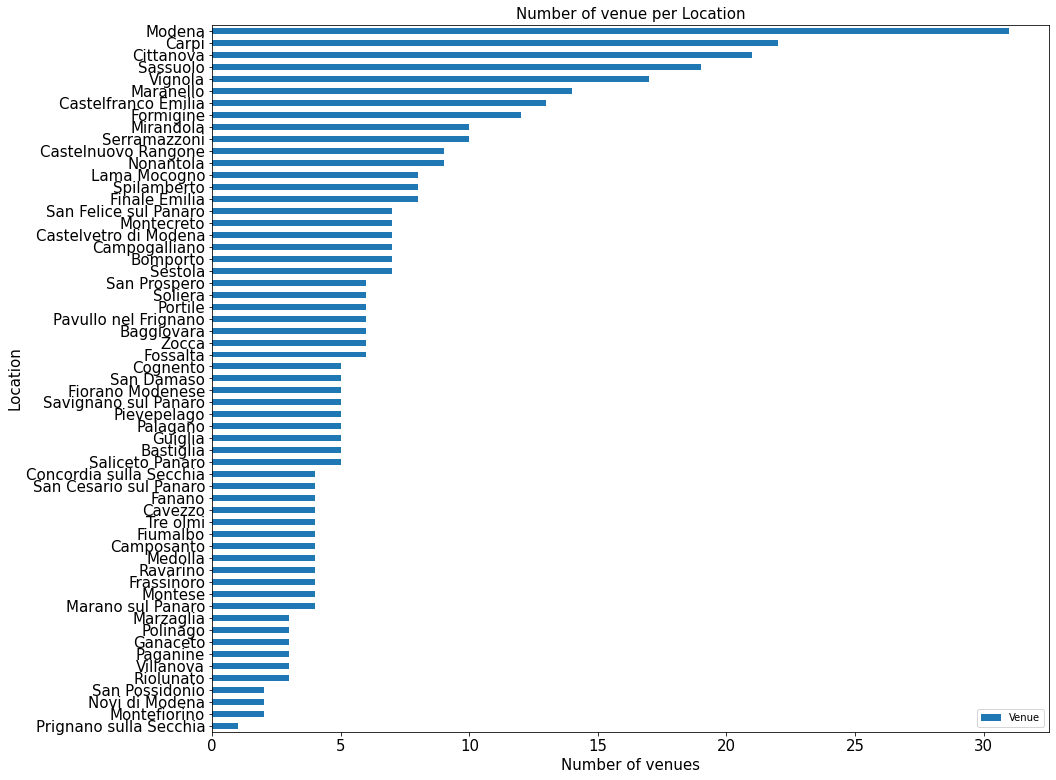

In [871]:
#Count the venues per each location
location_venue_count = location_venue.groupby('Location').count()[['Venue']].sort_values(by='Venue',ascending=False)
#create an inverted horizontal bar plot
location_venue_count.plot(kind='barh', figsize=(15, 13),fontsize=15)
plt.gca().invert_yaxis()
plt.ylabel('Location',fontsize=15)
plt.xlabel('Number of venues',fontsize=15)
plt.title('Number of venue per Location',fontsize=15)
plt.show()

In [663]:
print('The data table includes {} uniques categories.'.format(len(location_venue['Venue Category'].unique())))

The data table includes 108 uniques categories.


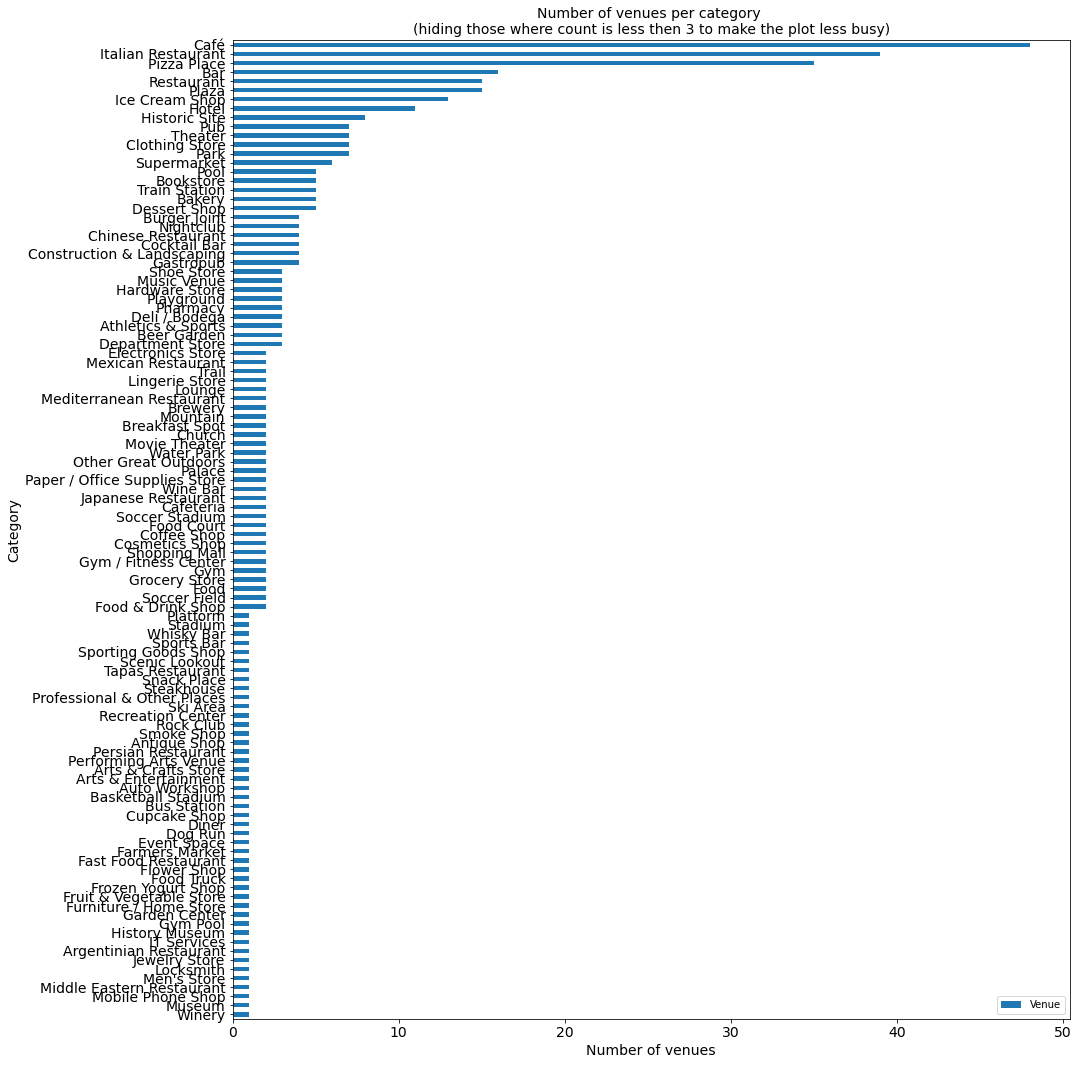

In [872]:
#Count the venues per each category
location_venue_count = location_venue.groupby('Venue Category').count()[['Venue']].sort_values(by='Venue',ascending=False)
#create an inverted horizontal bar plot
location_venue_count[location_venue_count.Venue>=0].plot(kind='barh', figsize=(15, 18),fontsize=14)
plt.gca().invert_yaxis()
plt.xlabel('Number of venues',fontsize=14)
plt.ylabel('Category',fontsize=14)
plt.title('Number of venues per category \n(hiding those where count is less then 3 to make the plot less busy)',fontsize=14)
plt.show()

### 2.2 Explorig Locations

In my analisys, I will consider those categories with at least 7 venues.  
Let's take the categories that have more than 6 venues:

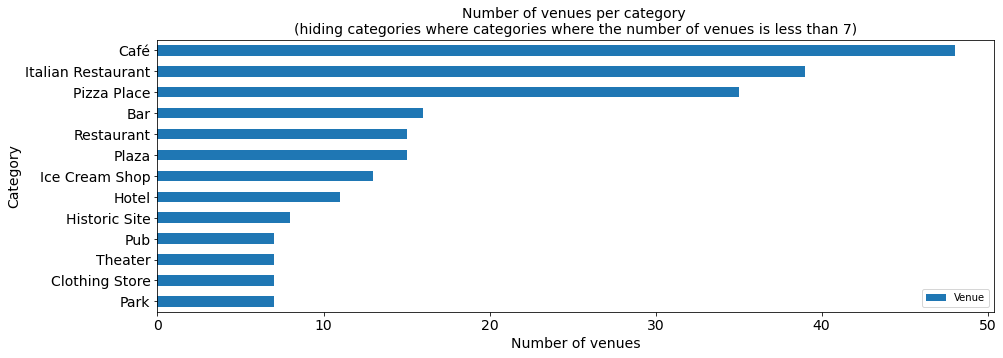

In [873]:
#Count the venues per each category
location_venue_count = location_venue.groupby('Venue Category').count()[['Venue']].sort_values(by='Venue',ascending=False)
#create an inverted horizontal bar plot
location_venue_count[location_venue_count.Venue>6].plot(kind='barh', figsize=(15, 5),fontsize=14)
plt.gca().invert_yaxis()
plt.xlabel('Number of venues',fontsize=14)
plt.ylabel('Category',fontsize=14)
plt.title('Number of venues per category \n(hiding categories where categories where the number of venues is less than 7)',fontsize=14)
plt.show()

Create the table with only "popular" (more than 6 venues) categories:

In [826]:
location_venue_count_filtered = location_venue_count[location_venue_count['Venue']>6]
location_venue_count_filtered.reset_index(inplace=True)
venue_category_popular_list = location_venue_count_filtered['Venue Category']
location_venue_popular = location_venue[location_venue['Venue Category'].isin(venue_category_popular_list)]
location_venue_popular.head(3)

,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Modena,44.650177,10.921732,Piazza della Pomposa,44.649044,10.923808,Plaza
1,Modena,44.650177,10.921732,Osteria Ermes,44.649429,10.925370,Italian Restaurant
5,Modena,44.650177,10.921732,Tri Scalein,44.650010,10.923910,Café


Replace some common categories with a unique name

In [828]:
location_venue_popular.replace(to_replace='Italian Restaurant',value='Restaurant',inplace=True)
location_venue_popular.replace(to_replace='Café',value='Bar',inplace=True)
location_venue_popular.head(3)

c:\users\sebastian\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Location,Location Latitude,Location Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Modena,44.650177,10.921732,Piazza della Pomposa,44.649044,10.923808,Plaza
1,Modena,44.650177,10.921732,Osteria Ermes,44.649429,10.925370,Restaurant
5,Modena,44.650177,10.921732,Tri Scalein,44.650010,10.923910,Bar


Let's analize each location:

In [829]:
# one hot encoding
location_onehot = pd.get_dummies(location_venue_popular[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
location_onehot['Location'] = location_venue_popular['Location'].values

# move neighborhood column to the first column
fixed_columns = [location_onehot.columns[-1]] + list(location_onehot.columns[:-1])
location_onehot = location_onehot[fixed_columns]

location_onehot.head(5)

,Location,Bar,Clothing Store,Historic Site,Hotel,Ice Cream Shop,Park,Pizza Place,Plaza,Pub,Restaurant,Theater
0,Modena,0,0,0,0,0,0,0,1,0,0,0
1,Modena,0,0,0,0,0,0,0,0,0,1,0
5,Modena,1,0,0,0,0,0,0,0,0,0,0
9,Modena,0,0,0,0,0,0,1,0,0,0,0
10,Modena,1,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by location and by taking the mean of the frequency of occurrence of each category

In [830]:
location_grouped = location_onehot.groupby('Location').mean().reset_index()
location_grouped.head(3)

,Location,Bar,Clothing Store,Historic Site,Hotel,Ice Cream Shop,Park,Pizza Place,Plaza,Pub,Restaurant,Theater
0,Baggiovara,0.500000,0.0,0.0,0.5,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,Bastiglia,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.000000,0.333333,0.0
2,Bomporto,0.000000,0.0,0.0,0.0,0.0,0.0,0.666667,0.0,0.333333,0.000000,0.0


#### Let's print each location along with the top 5 most common venues

In [831]:
num_top_venues = 5

for hood in location_grouped['Location']:
    print("----"+hood+"----")
    temp = location_grouped[location_grouped['Location'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Baggiovara----
            venue  freq
0             Bar   0.5
1           Hotel   0.5
2  Clothing Store   0.0
3   Historic Site   0.0
4  Ice Cream Shop   0.0


----Bastiglia----
            venue  freq
0             Bar  0.33
1     Pizza Place  0.33
2      Restaurant  0.33
3  Clothing Store  0.00
4   Historic Site  0.00


----Bomporto----
            venue  freq
0     Pizza Place  0.67
1             Pub  0.33
2             Bar  0.00
3  Clothing Store  0.00
4   Historic Site  0.00


----Campogalliano----
            venue  freq
0             Bar   0.4
1      Restaurant   0.4
2     Pizza Place   0.2
3  Clothing Store   0.0
4   Historic Site   0.0


----Camposanto----
            venue  freq
0             Bar   0.5
1  Ice Cream Shop   0.5
2  Clothing Store   0.0
3   Historic Site   0.0
4           Hotel   0.0


----Carpi----
            venue  freq
0             Bar  0.38
1           Plaza  0.15
2      Restaurant  0.15
3  Clothing Store  0.08
4           Hotel  0.08


----Castelfranc

            venue  freq
0            Park   0.5
1     Pizza Place   0.5
2             Bar   0.0
3  Clothing Store   0.0
4   Historic Site   0.0


----Vignola----
            venue  freq
0             Bar  0.27
1   Historic Site  0.18
2             Pub  0.18
3  Ice Cream Shop  0.09
4     Pizza Place  0.09


----Villanova----
            venue  freq
0     Pizza Place   1.0
1             Bar   0.0
2  Clothing Store   0.0
3   Historic Site   0.0
4           Hotel   0.0


----Zocca----
            venue  freq
0             Bar   0.6
1     Pizza Place   0.2
2           Plaza   0.2
3  Clothing Store   0.0
4   Historic Site   0.0




#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [832]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 5 venues for each neighborhood.

In [833]:
import numpy as np

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))


# create a new dataframe
location_venues_sorted = pd.DataFrame(columns=columns)

location_venues_sorted['Location'] = location_grouped['Location']

for ind in np.arange(location_grouped.shape[0]):
    location_venues_sorted.iloc[ind, 1:] = return_most_common_venues(location_grouped.iloc[ind, :], num_top_venues)

location_venues_sorted.head(5)

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Baggiovara,Hotel,Bar,Theater,Restaurant,Pub
1,Bastiglia,Restaurant,Pizza Place,Bar,Theater,Pub
2,Bomporto,Pizza Place,Pub,Theater,Restaurant,Plaza
3,Campogalliano,Restaurant,Bar,Pizza Place,Theater,Pub
4,Camposanto,Ice Cream Shop,Bar,Theater,Restaurant,Pub


### 2.3 Clustering Locations

Here I create the clusters using the K-Mean algorithm. Let's import the library:

In [758]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

To choose the best number of cluster, we use the Elbow method. See https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f for more details.

In [759]:
Sum_of_squared_distances = []
location_grouped_clustering = location_grouped.drop('Location', 1)
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(location_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

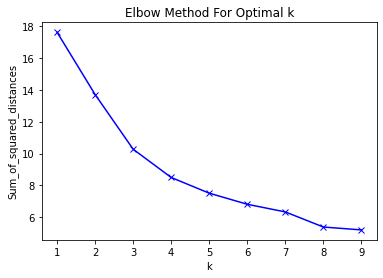

In [760]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

The elbow seems to be at 4.   
Run *k*-means to cluster the neighborhood into 4 clusters.

In [762]:
# set number of clusters
kclusters = 4
location_grouped_clustering = location_grouped.drop('Location', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(location_grouped_clustering)

Let's create a new dataframe that includes the cluster as well as the top 5 venues for each

In [765]:
location_venues_sorted.head(3)

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Baggiovara,Hotel,Bar,Theater,Restaurant,Pub
1,Bastiglia,Restaurant,Pizza Place,Bar,Theater,Pub
2,Bomporto,Pizza Place,Pub,Theater,Restaurant,Plaza


In [767]:
# add clustering labels
location_venues_sorted_cluster = location_venues_sorted.copy()
location_venues_sorted_cluster.insert(0, 'Cluster Labels', kmeans.labels_)

location_merged = df_location_raw

# merge location_grouped with location_data to add latitude/longitude for each neighborhood
location_merged = location_merged.join(location_venues_sorted_cluster.set_index('Location'), on='Location')

#remove non clustered locations
location_merged.dropna(subset = ["Cluster Labels"], inplace=True)

location_merged.head(5)

,Location,Latitude,Longitude,DistanceToMaranello,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Modena,44.650177,10.921732,22.96,0.0,Pizza Place,Bar,Restaurant,Plaza,Theater
1,Marzaglia,44.650963,10.803609,20.87,3.0,Restaurant,Theater,Pub,Plaza,Pizza Place
2,Cittanova,44.650268,10.850284,21.80,1.0,Clothing Store,Restaurant,Ice Cream Shop,Bar,Theater
4,Baggiovara,44.607764,10.867751,11.27,0.0,Hotel,Bar,Theater,Restaurant,Pub
5,Portile,44.581415,10.938073,11.72,0.0,Bar,Pizza Place,Theater,Restaurant,Pub


In [768]:
# change cluster values to integer
location_merged['Cluster Labels'] = location_merged['Cluster Labels'].astype(int)

Finally, let's visualize the resulting clusters on the map

In [839]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[ferrari_lat, ferrari_lon], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(location_merged['Latitude'], location_merged['Longitude'], location_merged['Location'], location_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
    folium.Marker(
    location=[ferrari_lat, ferrari_lon],
    popup='Ferrari',
    icon=folium.Icon(color='red')
).add_to(map_clusters)
       
map_clusters

### 2.4 Examin clusters

Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, let's assign a name to each cluster.

In [842]:
#get the top categories
top_venue_count = location_merged
top_venue_count = top_venue_count.drop(['Location','Latitude','Longitude','DistanceToMaranello'], axis=1)
top_venue_count = top_venue_count.groupby(['Cluster Labels', '1st Most Common Venue']).size().reset_index(name='Count')
top_venue_count.head(3)

,Cluster Labels,1st Most Common Venue,Count
0,0,Bar,13
1,0,Hotel,1
2,0,Ice Cream Shop,2


Let's transpose the data frame so that the columns are 1st Most Common Venue



In [843]:
cluster_venue = top_venue_count.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Count')
# change NaN values to 0
cluster_venue = cluster_venue.fillna(0).astype(int).reset_index(drop=True)
cluster_venue

1st Most Common Venue,Bar,Clothing Store,Historic Site,Hotel,Ice Cream Shop,Pizza Place,Plaza,Pub,Restaurant,Theater
0,13,0,0,1,2,3,0,0,6,0
1,1,1,1,0,0,0,1,2,7,3
2,0,0,0,0,0,7,0,0,0,0
3,0,0,0,0,0,0,0,0,7,0


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

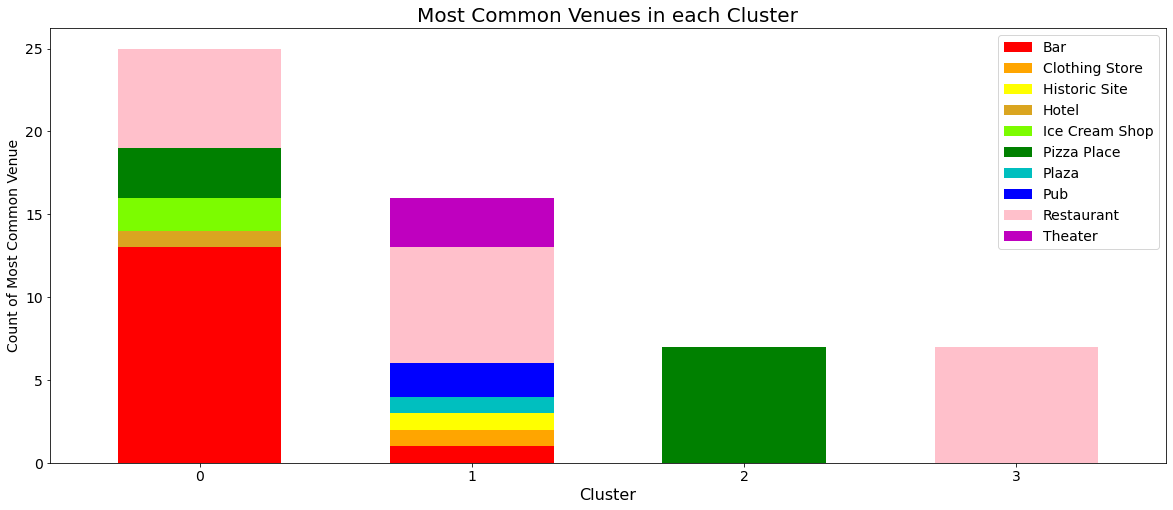

In [874]:
# Create a bar chart of most common venues of each cluster
my_colors = ['r','orange','yellow','goldenrod','lawngreen','g','c','b','pink','m','indigo','k','brown']
cv_plot = cluster_venue.plot(kind='bar', stacked=True,
                            figsize=(20,8), color=my_colors,
                            width=0.6,fontsize = 14)
plt.title("Most Common Venues in each Cluster", fontsize=20)
plt.xlabel("Cluster", fontsize=16)
plt.ylabel("Count of Most Common Venue", fontsize=14)
plt.legend(labels=cluster_venue.columns, fontsize=14)
plt.xticks(rotation=0, fontsize=14)

With the plot above, I can label each cluster:

In [856]:
cluster_label = {'Cluster':[0,1,2,3], 'Label':['Bars/Restaurants/Pizza and IceCream with some Hotels', 'Mainly Restaurant, with some theaters and stores', 'Mainly Pizza', 'Only Restaurants']}
cluster_label = pd.DataFrame(data=cluster_label)
cluster_label

,Cluster,Label
0,0,Bars/Restaurants/Pizza and IceCream with some ...
1,1,"Mainly Restaurant, with some theaters and stores"
2,2,Mainly Pizza
3,3,Only Restaurants


Let's also add the top 3 venues for each location.

In [857]:
top_3 = location_venue_popular.groupby(['Location','Venue Category']).size().reset_index(name='Count')
top_3 = top_3.sort_values(['Location','Count'], ascending=False).groupby('Location').head(3).reset_index(drop=True)
# new column
top_3['Top Venues'] = top_3['Count'].map(str) + " " + top_3['Venue Category']
top_3 = top_3.groupby(['Location'])['Top Venues'].apply(", ".join).reset_index()
top_3.head()

,Location,Top Venues
0,Baggiovara,"1 Bar, 1 Hotel"
1,Bastiglia,"1 Bar, 1 Pizza Place, 1 Restaurant"
2,Bomporto,"2 Pizza Place, 1 Pub"
3,Campogalliano,"2 Bar, 2 Restaurant, 1 Pizza Place"
4,Camposanto,"1 Bar, 1 Ice Cream Shop"


Merge new variables (Label and Top Venues) into our final data frame

In [858]:
df_location4 = location_merged.merge(top_3[['Location', 'Top Venues']], left_on='Location', right_on='Location')
df_location4 = df_location4.merge(cluster_label[['Cluster', 'Label']], left_on='Cluster Labels', right_on='Cluster')
df_location4 = df_location4.drop(['Cluster'], axis=1)
df_location4.head(5)

,Location,Latitude,Longitude,DistanceToMaranello,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Top Venues,Label
0,Modena,44.650177,10.921732,22.96,0,Pizza Place,Bar,Restaurant,Plaza,Theater,"4 Bar, 4 Pizza Place, 3 Restaurant",Bars/Restaurants/Pizza and IceCream with some ...
1,Baggiovara,44.607764,10.867751,11.27,0,Hotel,Bar,Theater,Restaurant,Pub,"1 Bar, 1 Hotel",Bars/Restaurants/Pizza and IceCream with some ...
2,Portile,44.581415,10.938073,11.72,0,Bar,Pizza Place,Theater,Restaurant,Pub,"2 Bar, 1 Pizza Place",Bars/Restaurants/Pizza and IceCream with some ...
3,San Damaso,44.601491,10.973861,18.95,0,Restaurant,Bar,Theater,Pub,Plaza,"1 Bar, 1 Restaurant",Bars/Restaurants/Pizza and IceCream with some ...
4,Saliceto Panaro,44.640259,10.972237,19.17,0,Restaurant,Bar,Theater,Pub,Plaza,"1 Bar, 1 Restaurant",Bars/Restaurants/Pizza and IceCream with some ...


## 3. Results discussion


In [862]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[ferrari_lat, ferrari_lon], zoom_start=9)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, lbl, dist, top_v in zip(
        df_location4['Latitude'], 
        df_location4['Longitude'], 
        df_location4['Location'], 
        df_location4['Cluster Labels'],
        df_location4['Label'],
        df_location4['DistanceToMaranello'], 
        df_location4['Top Venues']):
    label = folium.Popup(str(poi) + ', ' + 'Cluster ' + str(cluster) + ', ' + str(dist) + ' km from Ferrari' + ' - ' + str(lbl) + ' | TOP3--> ' + str(top_v), parse_html=True, max_width=450)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
    folium.Marker(
    location=[ferrari_lat, ferrari_lon],
    popup='Ferrari',
    icon=folium.Icon(color='red')
).add_to(map_clusters)
    
map_clusters

K-means clustering returned a total of 4 clusters based on 59 different locations around Ferrari (Maranello) within a maximum distance of 66 km.  
Examining the clusters:

Cluster 0 - Several Bars and Restaurant/Pizza with Ice Cream shops and few Hotels  
Cluster 1 - Several Restaurants but also social areas like theaters, pubs, Historic sites and clothing stores  
Cluster 2 - Mainly pizza places  
Cluster 3 - Mainly Restaurants  

The analysis could have been more precise by choosing a dynamic radius (instead of fixed) based on the location to properly get all the venues. For example, Modena is a big city but increasing the radius would affect the other small locations including outside venus. A compromise has been found.  
Also, including the house pricing per square mt would be an important information for those who want to buy a house.  

The distance to Ferrari (Maranello) is obviouly an important information to consider while choosing the right place, togheter with the population density. 

Including the house pricing per square mt would be an important information for those who want to buy a house. 

One of the main results from this analysis is that food is generally a common denominator for almost all the locations, and this can be confirmed by anyone that lives in the area.

## 4. Conclusions

People joining Ferrari have a lot of places where to find a house. Different services and different venues are available but the most common category here is "food". On top of that, based on the distance from the office, one can choose to stay in areas whit more green and less populatin density or places like Modena with more people.

Overall, the final decision to find an optimal location for a new resident will be made by the individuals themselves. As well as finding about how the different locations are characterised by the number of venues, they should also consider other factors such as transport, housing prices and access to different necessities.